In [1]:
import pandas as pd
df=pd.read_csv("/content/mcdonalds (1).csv")

In [2]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:
df.columns.values.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [4]:
df.shape


(1453, 15)

In [5]:
data= df.iloc[:, :11].replace({"Yes": 1, "No": 0})  ## Select first 11 columns and replace values
mean = round(data.mean().mean(), 2)  ## Calculate and round the overall mean

<ipython-input-5-4ddafeedf060>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= df.iloc[:, :11].replace({"Yes": 1, "No": 0})  ## Select first 11 columns and replace values


In [6]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [7]:

import numpy as np
from sklearn.decomposition import PCA

The code performs PCA on the dataset data, calculates the standard deviation, proportion of variance, and cumulative proportion for each principal component, and summarizes this information in a DataFrame.

In [8]:

# Initialize PCA and fit_transform
pca = PCA()
data_pca = pca.fit_transform(data)

# Calculate standard deviation and explained variance
SD = np.sqrt(pca.explained_variance_)
PV = pca.explained_variance_ratio_

# Create a summary DataFrame
summary = pd.DataFrame({
    "Standard Deviation": SD,
    "Proportion of Variance": PV,
    "Cumulative Proportion": PV.cumsum()},
index=[f"PC{i + 1}" for i in range(len(SD))])

# Display the summary DataFrame
summary


,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


here we gain insights into how the original features of your dataset relate to the principal components obtained from PCA. By understanding the loadings, you can see how much each feature contributes to the variance captured by the principal components, aiding in interpretation and dimensionality reduction.

In [9]:
# Loadings (coefficients of the original features in each principal component)
load = pca.components_

# Create the rotated matrix (transposed components)
rot_matrix = load.T

# Create a DataFrame for the rotated matrix
rot_df = pd.DataFrame(rot_matrix, index=data.columns.values, columns=[f"PC{i + 1}" for i in range(rot_matrix.shape[1])])

# Round the DataFrame values to three decimal places
rot_df = round(rot_df, 3)

# Display the rotated matrix DataFrame
rot_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,0.055,0.308,-0.171,-0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,-0.142,-0.278,0.348,-0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,0.198,-0.071,0.355,0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,-0.354,0.073,0.407,-0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,0.254,-0.361,-0.209,0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,-0.097,-0.108,0.595,-0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,0.119,0.129,0.103,-0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,-0.003,0.211,0.077,0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,0.068,0.003,0.261,-0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,0.763,-0.288,0.178,-0.350,-0.176,0.186,0.038,-0.158


In [10]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=15298b397abf432b27a9014f035f4c2ea9864298032470ceac12672d4c510e51
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


A biplot helps visualize the relationship between the original features and the principal components

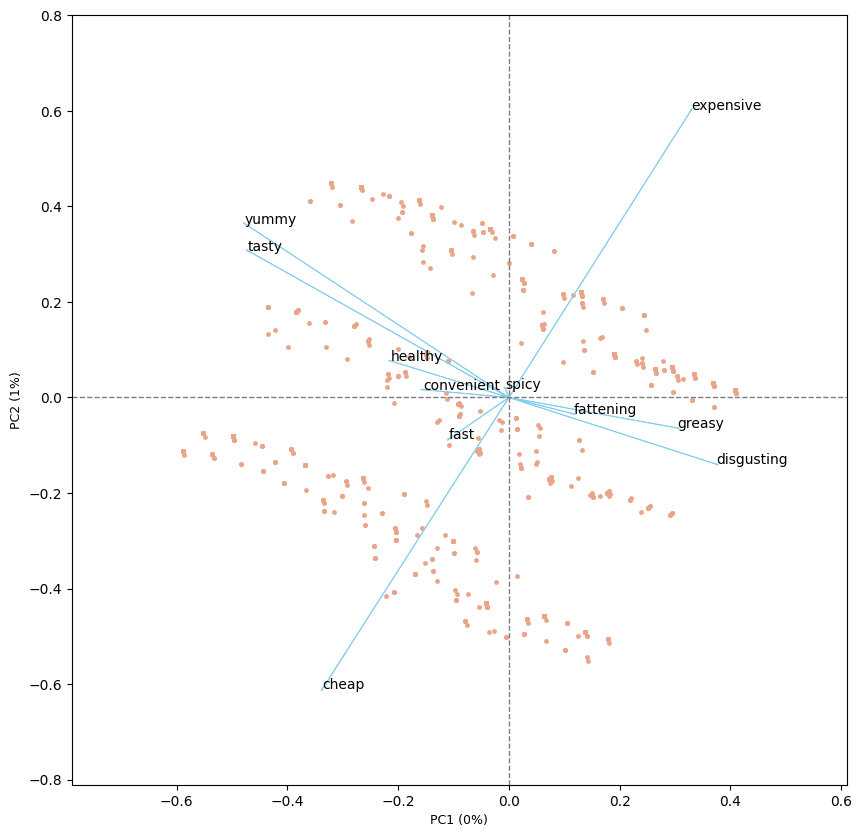

In [11]:
# Create a biplot to visualize PCA results
from bioinfokit.visuz import cluster
cluster.biplot(cscore=data_pca, loadings=-load, labels=data.columns.values, var1=0, var2=1, show=True, dim=(10, 10))

**K-means Clustering**

K-Means is an unsupervised machine learning algorithm that tries to group data into clusters based on their features.
K-Means tries to minimize the sum of squared distances between data points and the centroids of their assigned clusters. This sum is known as inertia or within-cluster distance. A lower inertia means data points are closer to their assigned cluster centroids, indicating a better clustering



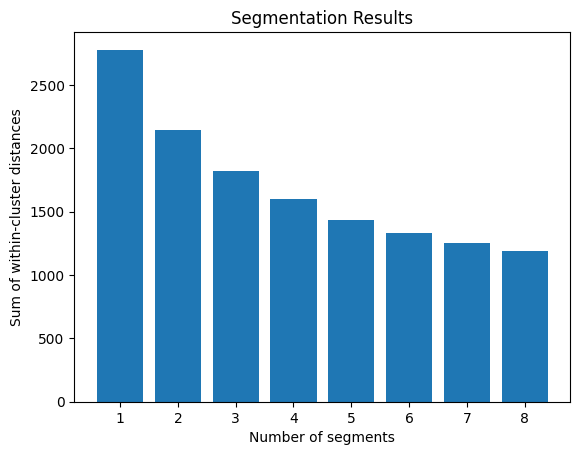

In [12]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# This ensures that the random initialization of centroids in the K-Means algorithm is the same every time you run the code. This is important because K-Means starts with random initial centroids, and the final clusters can vary depending on the starting points.
np.random.seed(1234)

#This sets nrep to 10, which is the number of times the K-Means algorithm will run with different centroid initializations (i.e., n_init=10 in the KMeans call).
nrep = 10

#range of clusters to test
num_segments = range(1, 9)

# Initialize dictionaries to store results.This list will store the inertia for each value of k
within_cluster_distances = []
data_km = {}  #This dictionary will store the fitted K-Means models for each value of k

# Loop through each number of clusters and fit KMeans
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(data)
    within_cluster_distances.append(kmeans.inertia_)  # Store the inertia (sum

    data_km[str(k)] = kmeans
#Create a bar plot showing the number of clusters (k) on the x-axis and the corresponding within-cluster distance (inertia) on the y-axis.
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

best_k = 0
best_score = -1
for k in range(2, 10):  # Typically, you start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=1234).fit(data)
    score = silhouette_score(data, kmeans.labels_)
    print(f"For n_clusters = {k}, silhouette score is {score}")

    if score > best_score:
        best_score = score
        best_k = k

print(f"The best number of clusters is {best_k} with a silhouette score of {best_score}.")

For n_clusters = 2, silhouette score is 0.2427004540090084
For n_clusters = 3, silhouette score is 0.21812819839526182
For n_clusters = 4, silhouette score is 0.259273541355323
For n_clusters = 5, silhouette score is 0.2526151250786464
For n_clusters = 6, silhouette score is 0.2668842097699828
For n_clusters = 7, silhouette score is 0.2817007800575648
For n_clusters = 8, silhouette score is 0.28530785291443445
For n_clusters = 9, silhouette score is 0.28156514463155186
The best number of clusters is 8 with a silhouette score of 0.28530785291443445.


Evaluate the stability of the clustering solution using the Adjusted Rand Index (ARI) across different numbers of clusters (k).

The Adjusted Rand Index (ARI) is a measure of the similarity between two sets of cluster labels. It adjusts for random chance, meaning that even if two clusterings are random, ARI will reflect that and score close to 0.

High ARI (close to 1) means that the clusters found in the resampled data are almost identical to those found in the original data, indicating high stability.
Low ARI (close to 0 or negative) means that the clustering results are inconsistent and likely unreliabl

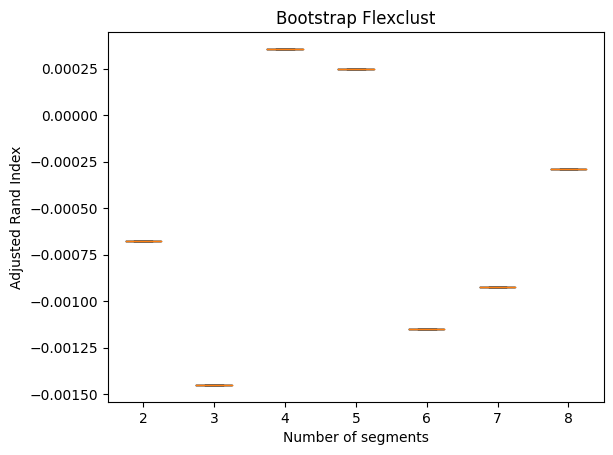

In [14]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
np.random.seed(1234)
nboot = 100   # Number of bootstrap samples
nrep = 10  # Number of KMeans initializations

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(data.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = [] #This list will store the stability scores (Adjusted Rand Index) for each value of k (the number of clusters) and each bootstrap sample.
num_segments = range(2, 9) #This range represents the number of clusters (k) you want to evaluate. Here, it ranges from 2 to 8 clusters.

for k in num_segments:   #For each bootstrap sample, you run K-Means clustering with k clusters. The number of clusters varies in the outer loop.
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(data.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()


**Segment Level Stability Across Solutions (SLSA) plot**

The primary goal of this plot is to assess the stability of clustering solutions as you change the number of segments (clusters).


*   A high stability score means that most data points remain in the same cluster, even when the number of clusters changes.
*   Flat, high lines in the plot indicate good cluster stability, while dropping lines indicate unstable clustering solutions.



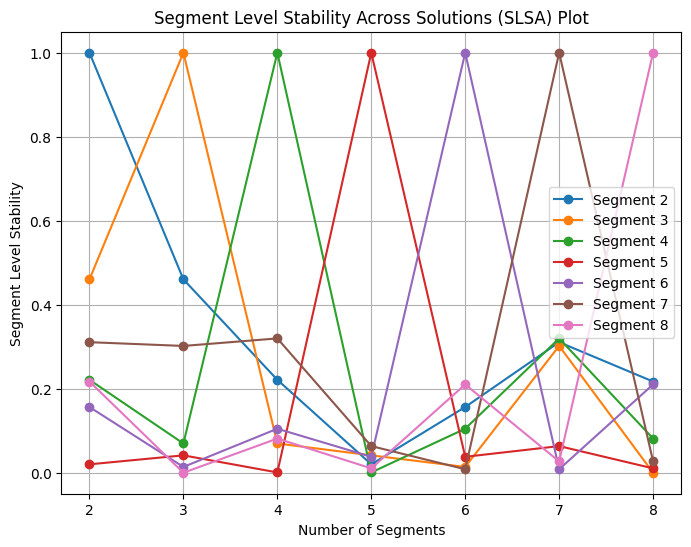

In [15]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = data_km[str(segment)].predict(data)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

This code is generating a boxplot to visualize the normalized segment stability within different segment solutions. The boxplot provides insights into the variation and distribution of segment stability values across different solutions.

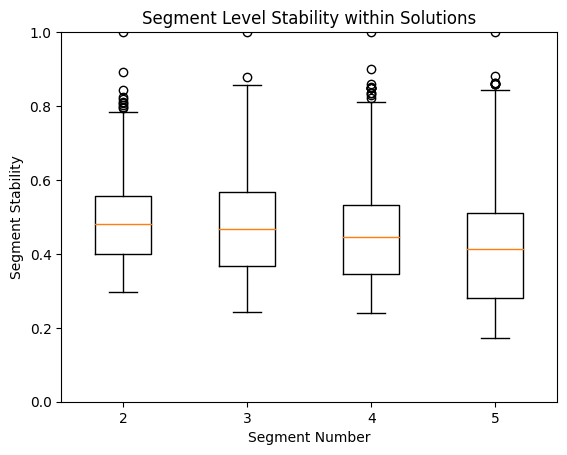

In [16]:
segment_solutions = ["2", "3", "4", "5"] #specifies that you're analyzing the clustering solutions with 2, 3, 4, and 5 clusters.
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = data_km[segment].predict(data) # assigns the cluster labels for each k value to the dictionary segment_labels

    segment_similarities[segment] = data_km[segment].transform(data).min(axis=1)
    #calculates the distance of each data point to the nearest cluster centroid for each k value. The transform method in K-Means returns the distance of each data point to all cluster centroids.
    #The min(axis=1) ensures that you're getting the distance to the closest centroid for each point.

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    #normalizes the similarities (or distances) by dividing by the maximum distance in that cluster solution. This scales all values between 0 and 1, where:
    #0 means the point is exactly at the centroid (perfect fit to the cluster).
    # 1 means the point is farthest from its nearest centroid (poorest fit).
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

This method helps you assess which clustering solution (for a given k) is optimal by using metrics that balance goodness of fit with model complexity and cluster quality.
The best number of clusters is the one with the lowest ICL, but you can also consider AIC and BIC for additional insights.

In [17]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
data_M = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(data.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = data.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    data_M.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
data_M = pd.DataFrame(data_M, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(data_M)

#look for the lowest AIC, BIC, and ICL values to determine the best number of clusters.

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0    10       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     9       True  4   4 -1603.913802  3215.827604  3236.953147  3235.627738
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662




*   The purpose is to compare and analyze the clustering solutions obtained from two different clustering algorithms: K-Means and Gaussian Mixture Model (GMM). Additionally, the code applies K-Means clustering on a subset of data points that belong to one specific cluster from the GMM solution, and then it cross-tabulates (compares) the results of both clustering methods.
*  After applying both clustering methods, the code then narrows down to a specific cluster from GMM  and examines the internal structure of this cluster by applying K-Means to the data points inside it. This helps you understand whether the GMM cluster is stable and homogenous or if there are further divisions within that cluster.



In [18]:
from sklearn.mixture import GaussianMixture
k = 4
#KMeans is initialized with 4 clusters (k=4).
# The model is fit on your data data, and the resulting cluster assignments are stored in kmeans_clusters. Each data point in datais assigned to one of the 4 clusters created by KMeans.
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(data)
kmeans_clusters = kmeans.predict(data)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(data)
gmm_clusters = gmm.predict(data)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = data[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256
kmeans   0   1   2   3
kmeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


The code acompare the log-likelihoods of two instances of the GMM model fitted on the same dataset data with 4 components. Since both models are fitted in the same way with identical parameters, we expect the log-likelihoods to be very similar or identical, unless there are differences in the initialization.

*   Log-Likelihood (score) measures the goodness-of-fit of the model. A higher (less negative) log-likelihood means the model fits the data better. However, this is not always the sole criterion for model selection.
*  



In [19]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4, init_params='kmeans', random_state=1234)
gmm_m4a.fit(data)

log_likelihood_m4a = gmm_m4a.score(data)
gmm_m4 = GaussianMixture(n_components=4, init_params='kmeans', random_state=1234)
gmm_m4.fit(data)

log_likelihood_m4 = gmm_m4.score(data)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071887
Log-likelihood for MD.m4: 9.456781748071887


In [20]:
#This code calculates the frequency counts of unique values in the 'Like' column of a DataFrame, and then it prints these counts in reverse order. This can be useful for visualizing the distribution of 'Like' values in the column from the least frequent to the most frequent.
like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


<ipython-input-20-9108a64503fc>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  like_counts = pd.value_counts(df['Like'])


In [21]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)


like_n_counts = df['Like.n'].value_counts()


print(like_n_counts)

#This code creates a new column 'Like.n' in the DataFrame with numeric values based on the mapping defined in like_mapping.
#Then, it calculates the frequency counts of these numeric values in the new column and prints the resulting counts. This can help in understanding the distribution of sentiment or liking scores in a more standardized numeric form.

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [23]:
from patsy import dmatrices

independent_vars = df.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str

# The data variable contains the DataFrame, not df
f = dmatrices(formula_str, df)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


**Gaussian Mixture Model (GMM)** to cluster data and then predict cluster assignments based on the design matrix and the response variable (Like).


*    It clusters the samples in X into 2 clusters (since n_components=2).

*   Predicted Clusters: After fitting the model, it predicts which cluster each data point belongs to.
*  Cluster Sizes: The sizes (number of samples) of each predicted cluster are printed out.






In [25]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
import numpy as np

np.random.seed(1234)

# Generate design matrix X based on the formula in f.design_info
#The dmatrix function expects data as the second argument, not as a keyword argument.
X = dmatrix(f.design_info, data=df)

# Set GMM parameters
n_components = 2  # Number of clusters
n_init = 10  # Number of initializations
verbose = False  # Whether to print more details
n_rep = 10  # Number of replications (not needed for GMM)

# Fit Gaussian Mixture Model on X
model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose, random_state=1234)
MD_reg2 = model.fit(X)

# Predict cluster assignments
predicted_clusters = model.predict(X)

# Count the size of each cluster
cluster_sizes = np.bincount(predicted_clusters)

# Output the results
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i + 1}: {size}")

Cluster sizes:
Cluster 1: 985
Cluster 2: 468


KMeans clustering on  dataset  and then using PCA (Principal Component Analysis) to reduce the dimensionality of the data for visualization.

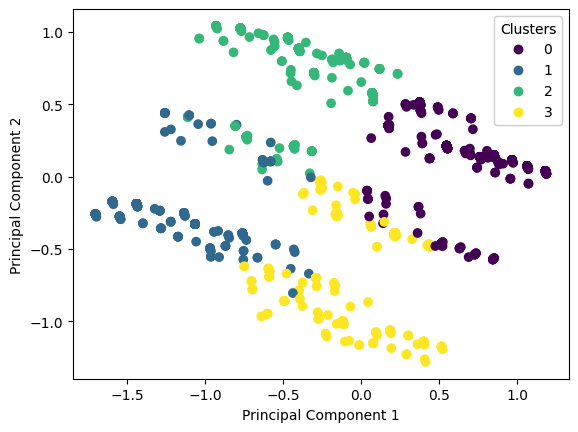

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# KMeans Clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

# PCA for Dimensionality Reduction (to 2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data)

# Plot with Cluster Coloring
fig, ax = plt.subplots()

# Scatter plot, color by KMeans cluster labels
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis')

# Adding labels for axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Adding colorbar to show which colors represent which clusters
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


This code aims to segment a population (based on categorical variables like preferences for food characteristics) using KMeans clustering. After clustering, it analyzes how these segments feel about the product or service through the Like variable, which measures sentiment. The mosaic plot is used to visualize this relationship, showing how different clusters (or customer segments) are associated with different levels of satisfaction or sentiment.

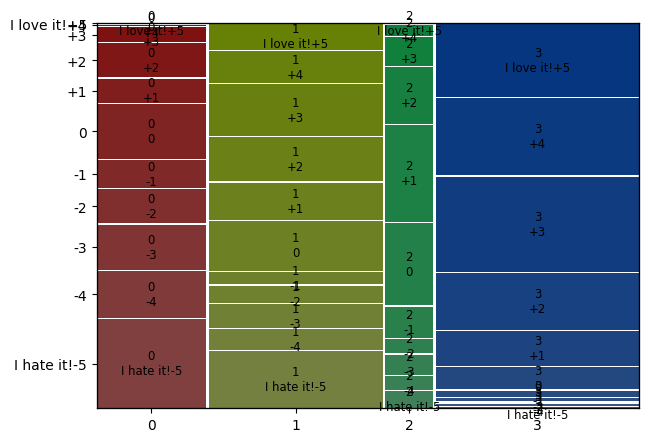

In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

#Label encoding for categorical - Converting 11 cols with yes/no
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/mcdonalds (1).csv') # Load the data into the 'data' dataframe

def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x]) # Use 'data' instead of 'data1' for consistency
    return data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

df_eleven = data.loc[:,cat] # Use 'data' instead of 'data1'
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(data['cluster_num'],data['Like'])

#Reordering cols
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

# KMeans Clustering using the encoded 'data'
kmeans = KMeans(n_clusters=4)

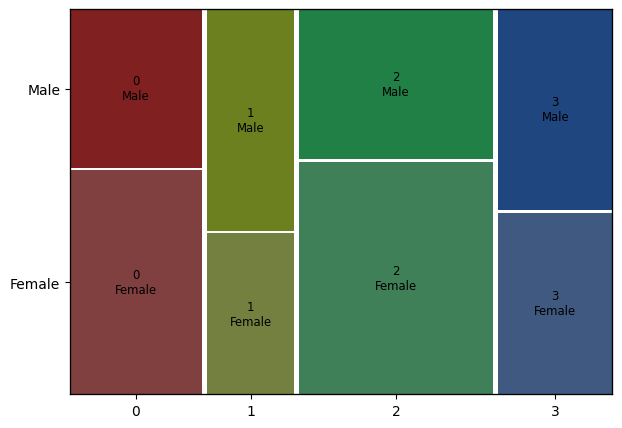

In [33]:
from statsmodels.graphics.mosaicplot import mosaic

data_k4=data_km['4']
k4 = data_k4.labels_

ct = pd.crosstab(k4, data['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

In [34]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit
#It helps provide insights into the average visit frequency of customers within each cluster,
#helping you understand potential differences in customer behavior across different segments.

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [35]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


In [37]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


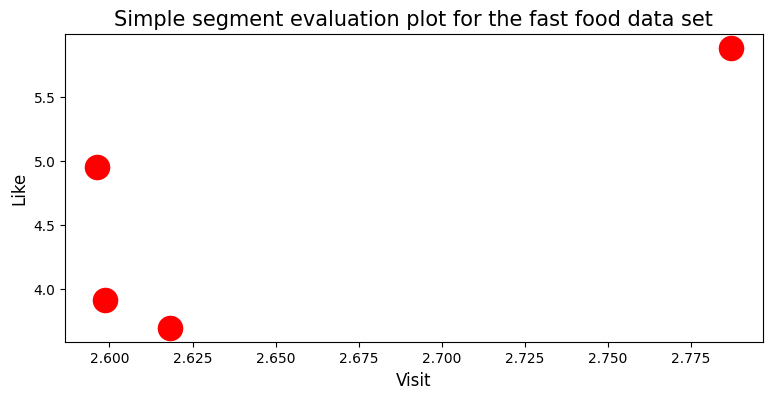

In [38]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()